### EDA, vizualization of some cases, check for consistency of labels

In [1]:
from panda_challenge.EDA_utils import makeSimpleEDAplots
from panda_challenge.EDA_utils import visualizeExampleMaskSlide, get_desc_image
from panda_challenge.EDA_utils import visualizeExampleSingeSlide, cropRandomExample
from panda_challenge.utils import crop_around_mask
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
DATA_DIR = '/data/personal_folders/skolchenko/panda' 
IMAGE_DIR = '/data/personal_folders/skolchenko/panda/train_images/'
MASK_DIR = '/data/personal_folders/skolchenko/panda/train_label_masks//'
TRAIN_LABELS = '/data/personal_folders/skolchenko/panda/train.csv'

Reference of Gleason and ISUP

![Gleason and ISUP score reference](images/reference_image.png)

In [3]:
train_labes = pd.read_csv(TRAIN_LABELS)

In [4]:
train_labes.pivot_table(index='isup_grade', columns='gleason_score', aggfunc='size', fill_value=0)

gleason_score,0+0,3+3,3+4,3+5,4+3,4+4,4+5,5+3,5+4,5+5,negative
isup_grade,,,,,,,,,,,
0,1925,0,0,0,0,0,0,0,0,0,967
1,0,2666,0,0,0,0,0,0,0,0,0
2,0,0,1342,0,1,0,0,0,0,0,0
3,0,0,0,0,1242,0,0,0,0,0,0
4,0,0,0,80,0,1126,0,43,0,0,0
5,0,0,0,0,0,0,849,0,248,127,0


One example with Gleason score 4+3 is labeled as 2 ISUP grade, but it should be 3  
Now visualize for different providers (Radboud and Karolinska)

In [5]:
radbound_labels = train_labes.loc[train_labes.data_provider == 'radboud', :]
radbound_labels.pivot_table(index='isup_grade', columns='gleason_score', aggfunc='size', fill_value=0)

gleason_score,3+3,3+4,3+5,4+3,4+4,4+5,5+3,5+4,5+5,negative
isup_grade,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,967
1,852,0,0,0,0,0,0,0,0,0
2,0,675,0,0,0,0,0,0,0,0
3,0,0,0,925,0,0,0,0,0,0
4,0,0,67,0,660,0,41,0,0,0
5,0,0,0,0,0,641,0,221,111,0


In [6]:
karolinska_labels = train_labes.loc[train_labes.data_provider == 'karolinska', :]
karolinska_labels.pivot_table(index='isup_grade', columns='gleason_score', aggfunc='size', fill_value=0)

gleason_score,0+0,3+3,3+4,3+5,4+3,4+4,4+5,5+3,5+4,5+5
isup_grade,,,,,,,,,,
0,1925,0,0,0,0,0,0,0,0,0
1,0,1814,0,0,0,0,0,0,0,0
2,0,0,667,0,1,0,0,0,0,0
3,0,0,0,0,317,0,0,0,0,0
4,0,0,0,13,0,466,0,2,0,0
5,0,0,0,0,0,0,208,0,27,16


Both providers have ISUP grade from 0 to 5; Distribution of Gleason scores amd ISUP grades is slighly different

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


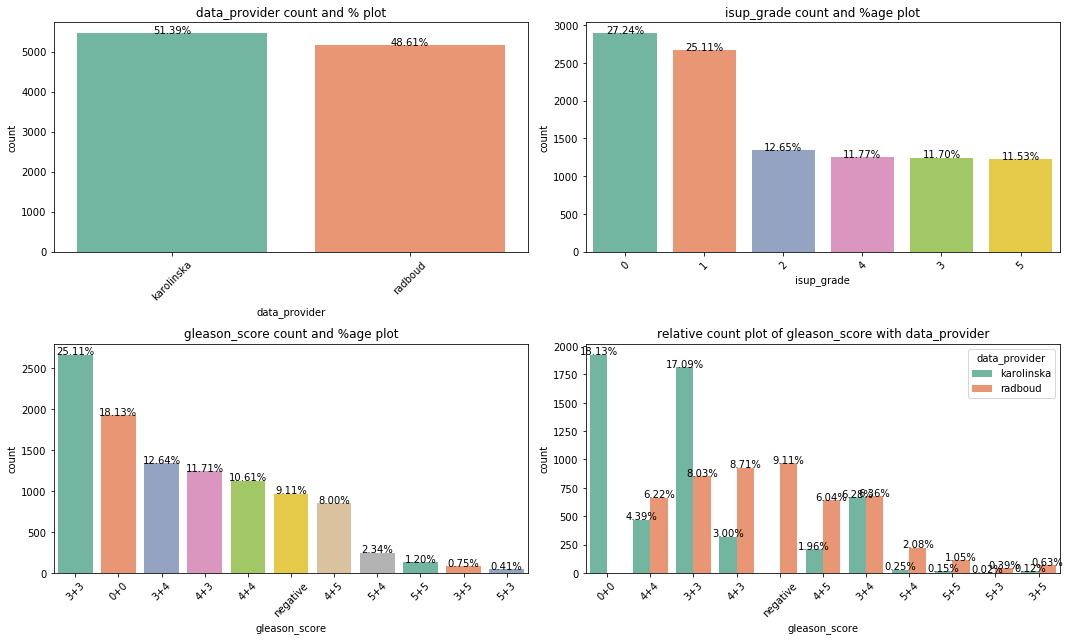

In [7]:
makeSimpleEDAplots(train_labes)

Visualization of slides patches, with and without masks

Combination of mask values:  
Radboud: Prostate glands are individually labelled. Valid values are:
0: background (non tissue) or unknown  
1: stroma (connective tissue, non-epithelium tissue)  
2: healthy (benign) epithelium  
3: cancerous epithelium (Gleason 3)  
4: cancerous epithelium (Gleason 4)  
5: cancerous epithelium (Gleason 5)  


Karolinska: Regions are labelled. Valid values are:  
1: background (non tissue) or unknown  
2: benign tissue (stroma and epithelium combined)  
3: cancerous tissue (stroma and epithelium combined)  


In [8]:
train_labes.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,0018ae58b01bdadc8e347995b69f99aa,radboud,4,4+4
3,001c62abd11fa4b57bf7a6c603a11bb9,karolinska,4,4+4
4,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


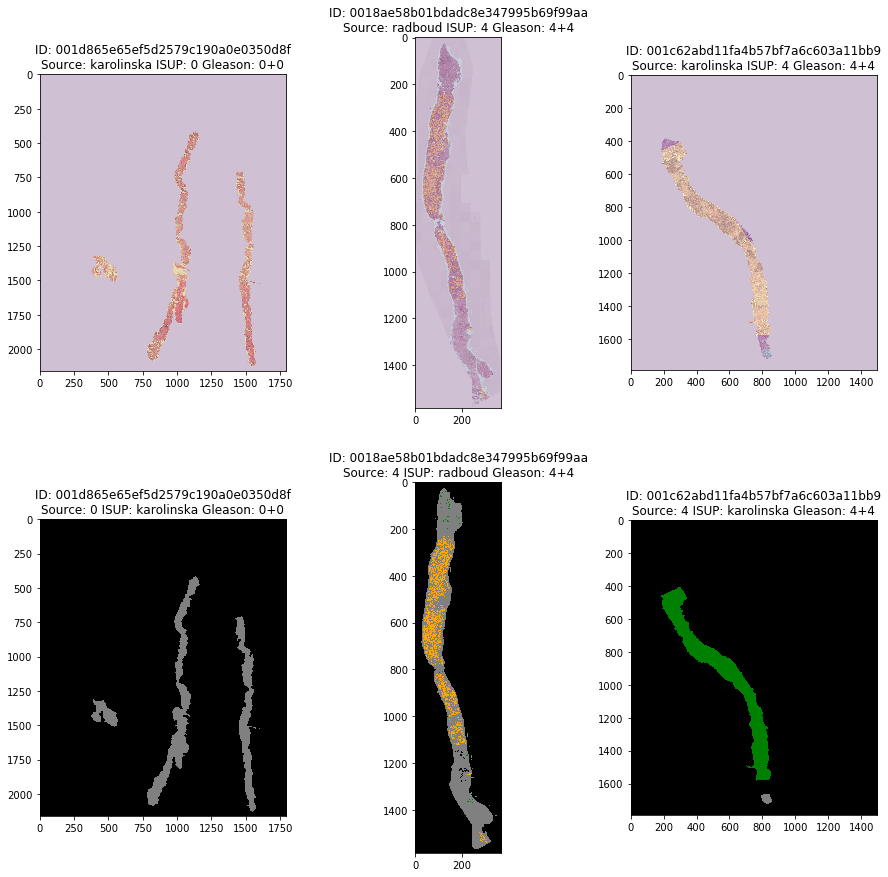

In [9]:
# Example of healty slide
f, ax = plt.subplots(2, 3, figsize=(15, 15))
slide_id = '001d865e65ef5d2579c190a0e0350d8f'
dp, isup_g, gl_s = get_desc_image(train_labes, slide_id)
visualizeExampleSingeSlide(slide_id, ax[0, 0], dp, isup_g, gl_s, DATA_DIR)
visualizeExampleMaskSlide(slide_id, ax[1, 0], dp, isup_g, gl_s, DATA_DIR)
# Example of cancer slide radboud
slide_id = '0018ae58b01bdadc8e347995b69f99aa'
dp, isup_g, gl_s = get_desc_image(train_labes, slide_id)
visualizeExampleSingeSlide(slide_id, ax[0, 1], dp, isup_g, gl_s, DATA_DIR)
visualizeExampleMaskSlide(slide_id, ax[1, 1], dp, isup_g, gl_s, DATA_DIR)
# Example of cancer slide radboud
slide_id = '001c62abd11fa4b57bf7a6c603a11bb9'
dp, isup_g, gl_s = get_desc_image(train_labes, slide_id)
visualizeExampleSingeSlide(slide_id, ax[0, 2], dp, isup_g, gl_s, DATA_DIR)
visualizeExampleMaskSlide(slide_id, ax[1, 2], dp, isup_g, gl_s, DATA_DIR)

Possible training pipelines  
1. Crop around mask (R_3, R_4, R_5 + K_3 as cancer, R_1, R_2 + K_2 as bening\healthy), run classification ISUP 
2. Only radbound: Crop around masks, run classification: gleason and ISUP, construct gleason score
3. Only radbound: Crop around masks, run segmentation + ISUP classification. Run segmentation on karolinska

Example of cropping around of non-empty mask

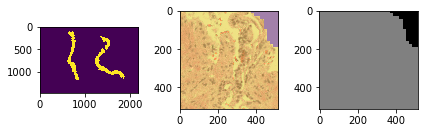

In [10]:
slide_id = train_labes.sample(1).image_id.values[0]
cropRandomExample(slide_id, DATA_DIR)